In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def read_data(folder_path):
    files = [f for f in os.listdir(folder_path) if f.endswith('.parquet') or f.endswith('.csv')]
    dataframes = {}
    for file in files:
        file_path = os.path.join(folder_path, file)
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file.endswith('.parquet'):
            df = pd.read_parquet(file_path)
        dataframes[file] = df
    return dataframes

In [3]:
import pyarrow
import fastparquet
print("pyarrow and fastparquet are available")

pyarrow and fastparquet are available


In [4]:
df = pd.read_parquet("C:\\Users\\princ\\Downloads\\AmEx-25\\data\\train_data.parquet")

In [5]:
# df = pd.read_parquet("C:\\Users\\RDRL\\Downloads\\train_data.parquet")
df.head(5)

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,28.0,0.0,0.0,337.0,0.0,0.0
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,87.0,0.0,0.0,1010.0,2.0,0.0019801980198019
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,1.0,None,None,None,...,None,None,0.0,None,23.0,0.0,0.0,1010.0,2.0,0.0019801980198019
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,277.0,1.0,0.003610108303249,337.0,0.0,0.0
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,1.0,None,None,None,...,None,-9999.0,0.0,None,359.0,0.0,0.0,337.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770164 entries, 0 to 770163
Columns: 372 entries, id1 to f366
dtypes: object(372)
memory usage: 2.1+ GB


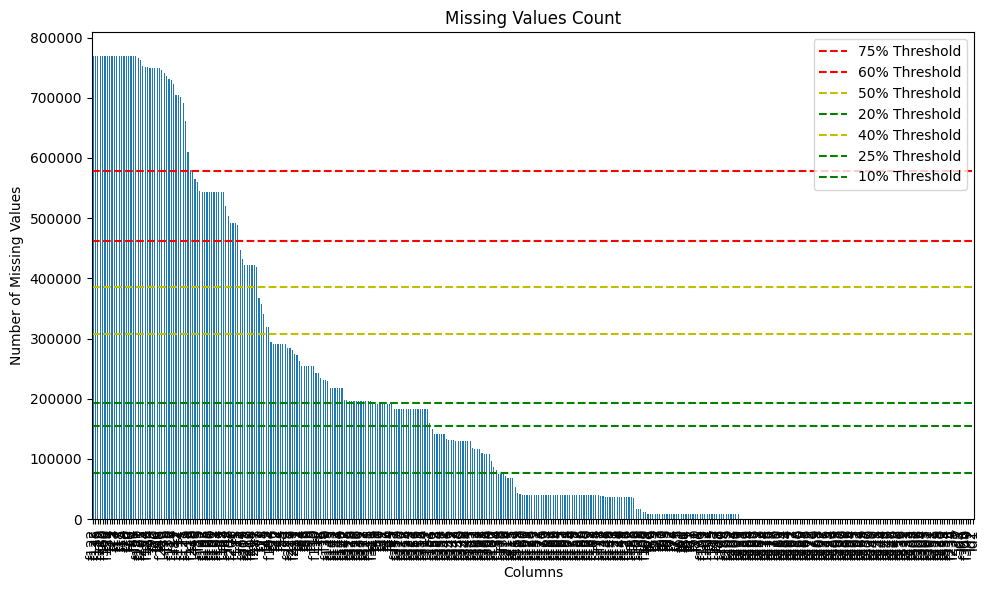

In [7]:
missing_value_count = df.isnull().sum().sort_values( ascending=False)
# plot for missing values
plt.figure(figsize=(10, 6))
missing_value_count.plot(kind='bar')
plt.axhline(y=0.75 * len(df), color='r', linestyle='--', label='75% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.60 * len(df), color='r', linestyle='--', label='60% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.50 * len(df), color='y', linestyle='--', label='50% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.20* len(df), color='g', linestyle='--', label='20% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.40 * len(df), color='y', linestyle='--', label='40% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.25 * len(df), color='g', linestyle='--', label='25% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.10 * len(df), color='g', linestyle='--', label='10% Threshold')  # marking line for 50% missing values
plt.legend()
plt.title('Missing Values Count')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [8]:
# features which have more than 75% missing values
features_to_drop = missing_value_count[missing_value_count > 0.75 * len(df)].index.tolist()
print("Features with more than 75% missing values:", features_to_drop)


Features with more than 75% missing values: ['f122', 'f135', 'f136', 'f112', 'f80', 'f360', 'f120', 'f34', 'f21', 'f13', 'f17', 'f18', 'f15', 'f14', 'f20', 'f19', 'f16', 'f84', 'f37', 'f189', 'f221', 'f205', 'f154', 'f176', 'f64', 'f92', 'f70', 'f66', 'f88', 'f220', 'f33', 'f79', 'f36', 'f118', 'f114', 'f81', 'f117', 'f4', 'f121', 'f3', 'f119', 'f116', 'f218']


In [11]:
# Load the dataset of data dictionary
data_dictionary = pd.read_csv(r"C:\Users\princ\Downloads\AmEx-25\details\data_dictionary.csv")

In [12]:
data_dictionary.head()

,masked_column,Description,Type
0,id1,Primary Key(masked),Key
1,id2,Customer ID (masked),-
2,id3,Offer ID,Categorical
3,id4,Event timestamp,Numerical
4,id5,Event Date,Numerical


In [13]:
def print_feature_details(features_to_drop, data_dictionary):
    for feature in features_to_drop:
        feature_info = data_dictionary[data_dictionary['masked_column'] == feature]
        if not feature_info.empty:
            for _, row in feature_info.iterrows():
                print(f"ID: {row['masked_column']}\nDescription: {row['Description']}\nType: {row['Type']}\nMissing Values: {missing_value_count[feature]}\n{'-'*60}")
        else:
            print(f"ID: {feature} - No information available in data dictionary.\n{'-'*60}")

In [14]:
# features which have more than 75% missing values
missing_value_count = missing_value_count.sort_values(ascending=False)
features_to_drop = missing_value_count[missing_value_count > 0.75 * len(df)].index.tolist()
print("Features with more than 75% missing values and their details:\n")

print_feature_details(features_to_drop, data_dictionary)

Features with more than 75% missing values and their details:

ID: f122
Description: Ratio of ctr in the last 90 days to the ctr in last 180 days for offer type Insurance
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f135
Description: CTR for last 60 days  for offer type business expenses
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f136
Description: CTR in last 60 days for offer type retail
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f112
Description: If offer type Insurance then ctr in last 180 days
Type: Numerical
Missing Values: 770164
------------------------------------------------------------
ID: f80
Description: Ratio of no of times estatement page is viewed in last 30 days to estatement page viewed in last 180 days
Type: Numerical
Missing Values: 770086
--------------------------------------------------

In [15]:
# print the feature details with no missing values 
features_imp = missing_value_count[missing_value_count == 0].index.tolist()
print("Features with no missing values and their details:\n")
print_feature_details(features_imp, data_dictionary)

Features with no missing values and their details:

ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: f350
Description: context variable fetched in real time where this is Number of seconds after 00:00 hrs 
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: f349
Description: context variable fetched in real time where 1 for Monday, 2 for Tuesday,&&&&, 7 for Sunday
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id2
Description

In [16]:
# print the feature details with 50000 missing values sorted by count
missing_value_count = missing_value_count.sort_values(ascending=True)
features_imp = missing_value_count[missing_value_count < 50000].index.tolist()
print("Features with less than 50000 missing values and their details:\n")
print_feature_details(features_imp, data_dictionary)

Features with less than 50000 missing values and their details:

ID: id1
Description: Primary Key(masked)
Type: Key
Missing Values: 0
------------------------------------------------------------
ID: id2
Description: Customer ID (masked)
Type: -
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: f349
Description: context variable fetched in real time where 1 for Monday, 2 for Tuesday,&&&&, 7 for Sunday
Type: Categorical
Missing Values: 0
------------

In [18]:
test_df = pd.read_parquet(r"C:\Users\princ\Downloads\AmEx-25\data\test_data.parquet")

In [19]:
test_df.head()

,id1,id2,id3,id4,id5,f1,f2,f3,f4,f5,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
46756,1362907_91950_16-23_2023-11-04 18:56:26.000794,1362907,91950,2023-11-04 18:56:26.000794,2023-11-04,None,None,None,None,None,...,0.0027807272790246,0.0465999838670646,0.0,None,1.0,0.0,0.0,56.0,0.0,0.0
57819,1082599_88356_16-23_2023-11-04 06:08:53.373,1082599,88356,2023-11-04 06:08:53.373,2023-11-04,None,9.0,None,None,None,...,0.0014287946777398,0.0603093514970909,0.0,None,195.0,13.0,0.0666666666666666,None,None,None
15390,1888466_958700_16-23_2023-11-05 10:07:28.000725,1888466,958700,2023-11-05 10:07:28.000725,2023-11-05,None,None,None,None,22.0,...,-0.0174961119751166,0.0734836702954899,0.0,None,155.0,67.0,0.432258064516129,1142.0,436.0,0.3817863397548161
145730,1888971_795739_16-23_2023-11-04 12:25:28.244,1888971,795739,2023-11-04 12:25:28.244,2023-11-04,None,None,None,None,None,...,0.0013159476327096,0.040572039549215,0.0,None,None,None,None,None,None,None
146085,1256369_82296_16-23_2023-11-05 06:45:26.657,1256369,82296,2023-11-05 06:45:26.657,2023-11-05,None,None,None,None,None,...,0.0020541699799278,0.038243539079214,0.0,None,29.0,2.0,0.0689655172413793,361.0,3.0,0.0083102493074792


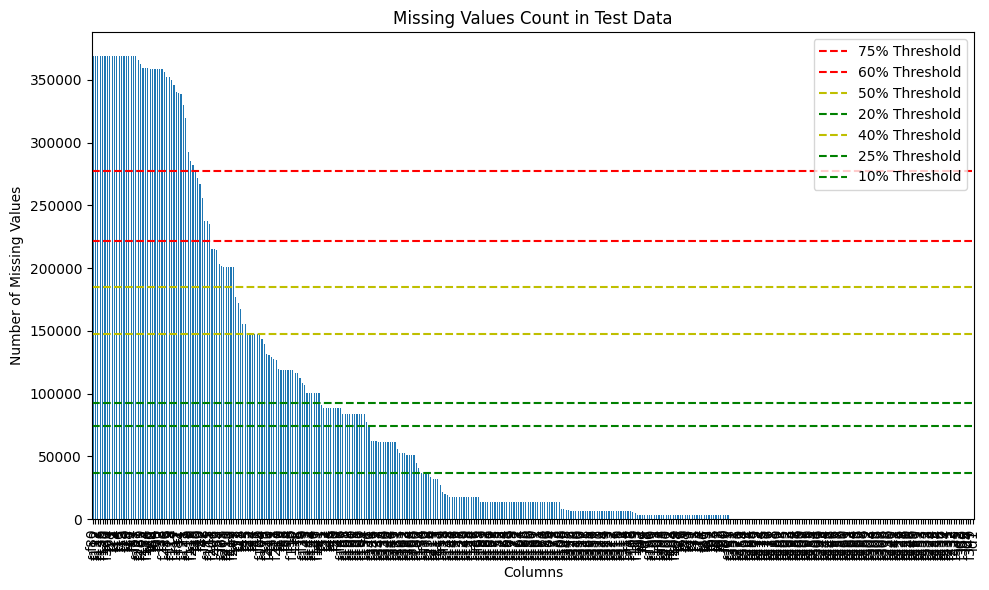

In [20]:
missing_value_count_test = test_df.isnull().sum().sort_values( ascending=False)
# plot for missing values in test data
plt.figure(figsize=(10, 6))
missing_value_count_test.plot(kind='bar')
plt.axhline(y=0.75 * len(test_df), color='r', linestyle='--', label='75% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.60 * len(test_df), color='r', linestyle='--', label='60% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.50 * len(test_df), color='y', linestyle='--', label='50% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.20* len(test_df), color='g', linestyle='--', label='20% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.40 * len(test_df), color='y', linestyle='--', label='40% Threshold')  # marking line for 75% missing values
plt.axhline(y=0.25 * len(test_df), color='g', linestyle='--', label='25% Threshold')  # marking line for 50% missing values
plt.axhline(y=0.10 * len(test_df), color='g', linestyle='--', label='10% Threshold')  # marking line for 50% missing values
plt.legend()
plt.title('Missing Values Count in Test Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [21]:
df.columns

Index(['id1', 'id2', 'id3', 'id4', 'id5', 'y', 'f1', 'f2', 'f3', 'f4',
       ...
       'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365',
       'f366'],
      dtype='object', length=372)

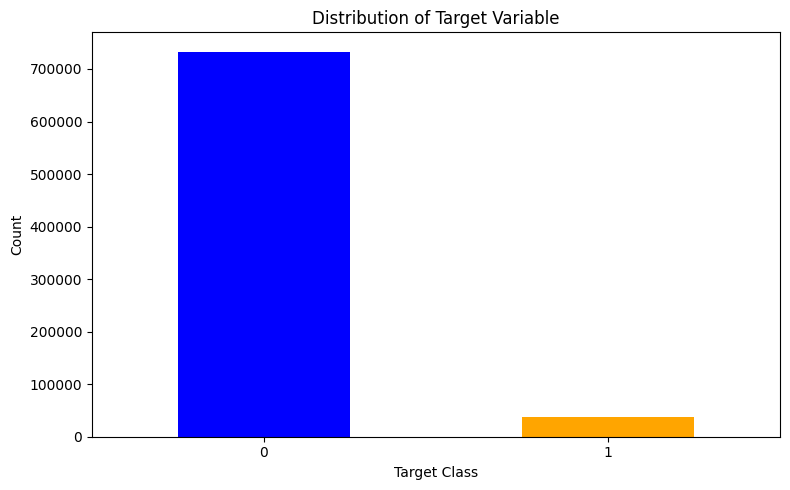

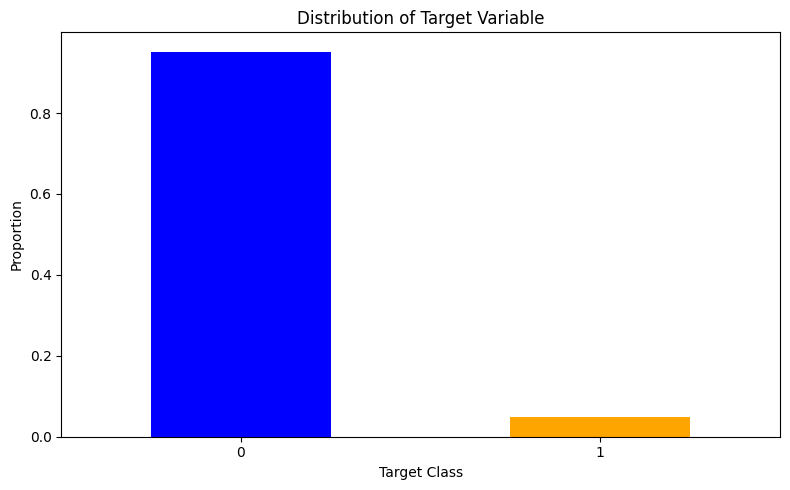

In [22]:
# Distribution of the y variable
y_distribution = df['y'].value_counts()
plt.figure(figsize=(8, 5))
y_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Normalized distribution of the y variable
y_distribution = df['y'].value_counts(normalize=True)
plt.figure(figsize=(8, 5))
y_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [23]:
df.sample(10)

,id1,id2,id3,id4,id5,y,f1,f2,f3,f4,...,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366
526265,1778805_99900_16-23_2023-11-02 07:00:30.199,1778805,99900,2023-11-02 07:00:30.199,2023-11-02,0,None,None,None,None,...,0.0105456921996702,0.0627939064567904,0.0,None,2.0,0.0,0.0,None,None,None
754271,1269860_391125_16-23_2023-11-02 14:21:51.719,1269860,391125,2023-11-02 14:21:51.719,2023-11-02,0,None,None,None,None,...,0.000158046461445,0.0487135434126718,0.0,None,2.0,0.0,0.0,94.0,1.0,0.0106382978723404
515428,1086495_56461_16-23_2023-11-03 01:30:18.153,1086495,56461,2023-11-03 01:30:18.153,2023-11-03,0,None,None,None,None,...,None,None,0.0,None,2.0,0.0,0.0,179.0,0.0,0.0
746983,1359392_78390_16-23_2023-11-01 19:56:27.000639,1359392,78390,2023-11-01 19:56:27.000639,2023-11-01,1,26.0,46.0,None,None,...,0.0010845243096338,0.0445309832569945,0.0,None,19.0,0.0,0.0,198.0,10.0,0.0505050505050505
371497,1045802_606173_16-23_2023-11-01 05:55:36.860,1045802,606173,2023-11-01 05:55:36.860,2023-11-01,0,None,28.0,32.0,None,...,0.0009322092563181,0.0414994841224349,0.0,None,177.0,1.0,0.0056497175141242,741.0,6.0,0.0080971659919028
723742,1621367_265308_16-23_2023-11-03 16:07:32.167,1621367,265308,2023-11-03 16:07:32.167,2023-11-03,0,None,None,None,None,...,0.0024590453773349,0.0433625374293002,0.0,None,None,None,None,None,None,None
22008,1024144_4608260_16-23_2023-11-02 18:55:22.844,1024144,4608260,2023-11-02 18:55:22.844,2023-11-02,0,39.0,None,None,None,...,None,-9999.0,0.0,None,372.0,0.0,0.0,280.0,1.0,0.0035714285714285
54411,1290415_960643_16-23_2023-11-01 12:28:06.612,1290415,960643,2023-11-01 12:28:06.612,2023-11-01,0,None,None,None,None,...,-0.0175490897527625,0.0409478760897792,0.0,None,9.0,0.0,0.0,232.0,3.0,0.0129310344827586
769902,1827233_5243695_16-23_2023-11-02 14:26:58.033,1827233,5243695,2023-11-02 14:26:58.033,2023-11-02,0,81.0,29.0,None,None,...,None,None,0.0,None,32.0,0.0,0.0,342.0,0.0,0.0
685122,1764357_83023_16-23_2023-11-02 12:55:19.494,1764357,83023,2023-11-02 12:55:19.494,2023-11-02,0,53.0,36.0,None,None,...,0.0012003016012012,0.0507301362959702,0.0,None,4.0,0.0,0.0,609.0,3.0,0.0049261083743842


In [24]:
# Rearrange the features in ascending order of missing values in a new DataFrame
sorted_columns = missing_value_count.sort_values(ascending=True).index.tolist()
df_sorted = df[sorted_columns]
df_sorted.sample(10)

,id1,id2,id3,id4,id5,y,f349,f350,f232,f233,...,f20,f14,f34,f120,f360,f80,f112,f136,f135,f122
569128,1235477_244622_16-23_2023-11-01 19:01:17.362,1235477,244622,2023-11-01 19:01:17.362,2023-11-01,0,4,68420,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
555670,1269964_10242_16-23_2023-11-01 13:13:01.487,1269964,10242,2023-11-01 13:13:01.487,2023-11-01,0,4,47457,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
633955,1079398_91943_16-23_2023-11-01 17:52:59.776,1079398,91943,2023-11-01 17:52:59.776,2023-11-01,0,4,64356,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
48057,1841720_606173_16-23_2023-11-01 05:23:39.305,1841720,606173,2023-11-01 05:23:39.305,2023-11-01,0,4,19403,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
45500,1338262_93192_16-23_2023-11-01 20:19:05.836,1338262,93192,2023-11-01 20:19:05.836,2023-11-01,0,4,72820,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
341815,1549332_281783_16-23_2023-11-03 13:07:37.898,1549332,281783,2023-11-03 13:07:37.898,2023-11-03,0,6,47235,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
39849,1739435_434753_16-23_2023-11-01 07:25:46.115,1739435,434753,2023-11-01 07:25:46.115,2023-11-01,0,4,26693,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
136090,1475679_57615_16-23_2023-11-02 12:23:41.537,1475679,57615,2023-11-02 12:23:41.537,2023-11-02,0,5,44512,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
494064,1281052_665874_16-23_2023-11-03 17:09:50.582,1281052,665874,2023-11-03 17:09:50.582,2023-11-03,0,6,61790,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
309600,1699721_7114_16-23_2023-11-03 12:10:39.573,1699721,7114,2023-11-03 12:10:39.573,2023-11-03,0,6,43768,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


In [25]:
df.shape

(770164, 372)

In [26]:
df_sorted.sample(10)

,id1,id2,id3,id4,id5,y,f349,f350,f232,f233,...,f20,f14,f34,f120,f360,f80,f112,f136,f135,f122
684945,1750948_68777_16-23_2023-11-01 17:40:51.052,1750948,68777,2023-11-01 17:40:51.052,2023-11-01,0,4,63649,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
661183,1248085_1416_16-23_2023-11-01 08:01:58.259,1248085,1416,2023-11-01 08:01:58.259,2023-11-01,0,4,28902,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
175090,1562526_92636_16-23_2023-11-02 07:52:45.410,1562526,92636,2023-11-02 07:52:45.410,2023-11-02,0,5,28207,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
760837,1384603_80107221_16-23_2023-11-03 11:18:46.337,1384603,80107221,2023-11-03 11:18:46.337,2023-11-03,0,6,40726,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
326759,1212695_403431_16-23_2023-11-03 16:58:04.619,1212695,403431,2023-11-03 16:58:04.619,2023-11-03,0,6,61082,0.0,1.0,...,None,None,None,None,None,None,None,None,None,None
327637,1446887_68480_16-23_2023-11-03 02:54:53.592,1446887,68480,2023-11-03 02:54:53.592,2023-11-03,0,6,10491,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
769833,1817452_81417_16-23_2023-11-01 09:39:12.939,1817452,81417,2023-11-01 09:39:12.939,2023-11-01,0,4,34684,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
182004,1477148_6275451_16-23_2023-11-03 09:43:32.929,1477148,6275451,2023-11-03 09:43:32.929,2023-11-03,0,6,35011,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
422316,1902341_218678_16-23_2023-11-01 22:45:35.338,1902341,218678,2023-11-01 22:45:35.338,2023-11-01,0,4,81931,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
703449,1578038_42023194_16-23_2023-11-03 17:19:35.330,1578038,42023194,2023-11-03 17:19:35.330,2023-11-03,0,6,62375,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


In [27]:
print_feature_details(sorted_columns,data_dictionary)

ID: id1
Description: Primary Key(masked)
Type: Key
Missing Values: 0
------------------------------------------------------------
ID: id2
Description: Customer ID (masked)
Type: -
Missing Values: 0
------------------------------------------------------------
ID: id3
Description: Offer ID
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: id4
Description: Event timestamp
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: id5
Description: Event Date
Type: Numerical
Missing Values: 0
------------------------------------------------------------
ID: y
Description: Dependent Variable
Type: Label
Missing Values: 0
------------------------------------------------------------
ID: f349
Description: context variable fetched in real time where 1 for Monday, 2 for Tuesday,&&&&, 7 for Sunday
Type: Categorical
Missing Values: 0
------------------------------------------------------------
ID: f350
Descrip

In [50]:
# rearranging in ascending order of missing values less than 25%
sorted_columns = missing_value_count[missing_value_count < 0.25 * len(df)].sort_values(ascending=True).index.tolist()
df_25 = df[sorted_columns]

In [51]:
def impute_missing_values(df, strategy='median'):
    df_imputed = df.copy()
    for column in df_imputed.columns:
        if df_imputed[column].isnull().any():
            if df_imputed[column].dtype == 'float64':
                if strategy == 'mean':
                    df_imputed[column].fillna(df_imputed[column].mean(), inplace=True)
                elif strategy == 'median':
                    df_imputed[column].fillna(df_imputed[column].median(), inplace=True)
            # elif str(df_imputed[column].dtype) in ['category', 'object']:
            #     df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)
    return df_imputed

In [52]:
# converting the column of df to respective dtypes as mentioned in the data dictionary
def convert_column_types(df, data_dictionary):
    type_map = {
        'Numerical': 'float64',
        'Categorical': 'category',
        'Key': 'category',
        'Label': 'category',
        'One hot encoded': 'category',
        '-': 'object',
    }
    for column in df.columns:
        if column in data_dictionary['masked_column'].values:
            dtype = data_dictionary.loc[data_dictionary['masked_column'] == column, 'Type'].iloc[0]
            if dtype in type_map:
                try:
                    df[column] = df[column].astype(type_map[dtype])
                except Exception as e:
                    print(f"Could not convert {column} to {type_map[dtype]}: {e}")
    return df

In [53]:
df_25 = convert_column_types(df_25,data_dictionary)

C:\Users\princ\AppData\Local\Temp\ipykernel_32428\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\princ\AppData\Local\Temp\ipykernel_32428\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\princ\AppData\Local\Temp\ipykernel_32428\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

Could not convert id4 to float64: could not convert string to float: '2023-11-02 22:22:00.042'
Could not convert id5 to float64: could not convert string to float: '2023-11-02'


C:\Users\princ\AppData\Local\Temp\ipykernel_32428\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\princ\AppData\Local\Temp\ipykernel_32428\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(type_map[dtype])
C:\Users\princ\AppData\Local\Temp\ipykernel_32428\4006871157.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [54]:
df_25.dtypes.value_counts()

float64     160
category     48
category     36
object        3
category      2
category      1
category      1
category      1
category      1
category      1
Name: count, dtype: int64

In [55]:
def print_object_columns(df):
    dtype_groups = {}
    for col in df.columns:
        dtype_str = str(df[col].dtype)
        dtype_groups.setdefault(dtype_str, []).append(col)
    for dtype, cols in dtype_groups.items():
        print(f"\nColumns with dtype '{dtype}' ({len(cols)} columns):")
        for col in cols:
            print(f"  - {col}")

In [56]:
print_object_columns(df_25)


Columns with dtype 'category' (91 columns):
  - id1
  - id3
  - y
  - f349
  - f232
  - f233
  - f249
  - f242
  - f250
  - f236
  - f231
  - f302
  - f301
  - f292
  - f291
  - f282
  - f299
  - f237
  - f300
  - f239
  - f240
  - f308
  - f307
  - f306
  - f305
  - f304
  - f303
  - f247
  - f248
  - f268
  - f267
  - f227
  - f226
  - f309
  - f298
  - f297
  - f290
  - f289
  - f296
  - f295
  - f294
  - f293
  - f281
  - f254
  - f263
  - f264
  - f261
  - f262
  - f257
  - f258
  - f241
  - f238
  - f243
  - f244
  - f245
  - f246
  - f270
  - f269
  - f253
  - f256
  - f283
  - f284
  - f285
  - f286
  - f287
  - f288
  - f273
  - f274
  - f275
  - f276
  - f277
  - f278
  - f279
  - f280
  - f255
  - f230
  - f229
  - f228
  - f252
  - f251
  - f260
  - f259
  - f265
  - f266
  - f272
  - f271
  - f235
  - f234
  - f354
  - f50
  - f52

Columns with dtype 'object' (3 columns):
  - id2
  - id4
  - id5

Columns with dtype 'float64' (160 columns):
  - f350
  - f332
  - f225
  - f

In [ ]:
df_25

,id1,id2,id3,id4,id5,y,f349,f350,f232,f233,...,f41,f45,f44,f46,f47,f51,f50,f52,f49,f313
0,1366776_189706075_16-23_2023-11-02 22:22:00.042,1366776,189706075,2023-11-02 22:22:00.042,2023-11-02,0,5,80458.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1366776_89227_16-23_2023-11-01 23:51:24.999,1366776,89227,2023-11-01 23:51:24.999,2023-11-01,0,4,85874.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1366776_35046_16-23_2023-11-01 00:30:59.797,1366776,35046,2023-11-01 00:30:59.797,2023-11-01,0,4,1855.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1366776_6275451_16-23_2023-11-02 22:21:32.261,1366776,6275451,2023-11-02 22:21:32.261,2023-11-02,0,5,80458.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1366776_78053_16-23_2023-11-02 22:21:34.799,1366776,78053,2023-11-02 22:21:34.799,2023-11-02,0,5,80458.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770159,1896641_87731_16-23_2023-11-02 08:14:21.524,1896641,87731,2023-11-02 08:14:21.524,2023-11-02,0,5,29659.0,0.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.054501
770160,1896641_505604_16-23_2023-11-02 08:14:24.458,1896641,505604,2023-11-02 08:14:24.458,2023-11-02,0,5,29659.0,1.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.055537
770161,1896641_25212_16-23_2023-11-02 08:14:25.748,1896641,25212,2023-11-02 08:14:25.748,2023-11-02,0,5,29659.0,1.0,0.0,...,68.02,8.0,0.0,38251.0,43867.0,8518.0,N,N,0.0,0.057477
770162,1900765_95157_16-23_2023-11-02 06:08:25.900,1900765,95157,2023-11-02 06:08:25.900,2023-11-02,0,5,22103.0,0.0,0.0,...,102.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data_dictionary['Type'].unique()

array(['Key', '-', 'Categorical', 'Numerical', 'Label', 'One hot encoded'],
      dtype=object)

In [36]:
# values count of each unique values in data_dictionary 
value_counts = data_dictionary['Type'].value_counts()
print("Unique values count in data dictionary:")
print(value_counts)


Unique values count in data dictionary:
Type
Numerical          273
One hot encoded     84
Categorical         12
Key                  1
-                    1
Label                1
Name: count, dtype: int64


In [37]:
# Count the number of columns with missing values grouped by dtype in df_25 out of total columns of particular dtype
missing_cols = df_25.columns[df_25.isnull().any()]
dtype_counts = df_25[missing_cols].dtypes.value_counts()
print("Number of columns with missing values grouped by dtype in df_25:")
print(dtype_counts)

Number of columns with missing values grouped by dtype in df_25:
float64     159
category     48
category     36
category      2
category      1
Name: count, dtype: int64


In [38]:
df_25.dtypes.value_counts()

float64     160
category     48
category     36
object        3
category      2
category      1
category      1
category      1
category      1
category      1
Name: count, dtype: int64

In [39]:
df_25_imp = impute_missing_values(df_25, strategy='median')

C:\Users\princ\AppData\Local\Temp\ipykernel_32428\3704776812.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[column].fillna(df_imputed[column].median(), inplace=True)
C:\Users\princ\AppData\Local\Temp\ipykernel_32428\3704776812.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [40]:
df_25_imp.isnull().sum().sort_values(ascending=False)

f50     190663
f52     190663
f354    141991
f249        18
f236        18
         ...  
f46          0
f51          0
f47          0
f49          0
f313         0
Length: 254, dtype: int64

In [59]:
df_25_imp['id2'].nunique()

46550

In [ ]:
# Distribution of the coustomer id
plt.figure(figsize=(10, 6)) 
df_25_imp['id2'].value_counts().plot(kind='bar')
plt.title('Distribution of Customer IDs')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()
